In [1]:
#install and import opencv library to do denoising for the image
!pip install opencv-python-headless==4.1.2.30
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.2 MB/s 


In [2]:
#install and import easyocr library to read text from image
!pip install easyocr
import easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 13 kB/s 


In [3]:
#install and import googletrans library to translate the text from image
!pip install install googletrans==3.1.0a0
from googletrans import Translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 65 kB 3.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=cc97e107ed54256a04addc82c36f73c8241e593728a38f249fa3980c9ef72ea9
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [4]:
#install and import gTTS library to convert text-to-speech
!pip install gTTS
from gtts import gTTS

#import Ipython.display.audio to directly play the audio in the python notebook
from IPython.display import Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#select the language to extract the text
#for the below example we want to extract it from the image that contains the Japanese language 
reader = easyocr.Reader(['ja'])

#Translator class used to translate text from one language into another language
translator = Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


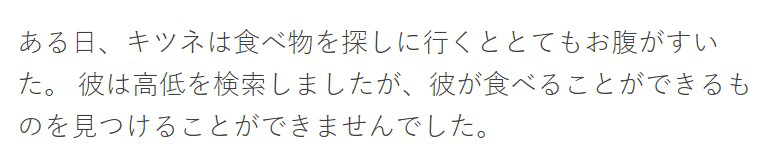

In [6]:
#import PIL (Python Imaging Library) which provides the python interpreter with image editing capabilities
import PIL

#import ImageDraw module from PIL to draw the bounding boxes in the given image
from PIL import ImageDraw

#open and read the image that wants to extract the text from
im = PIL.Image.open('story(jpn).png')
im

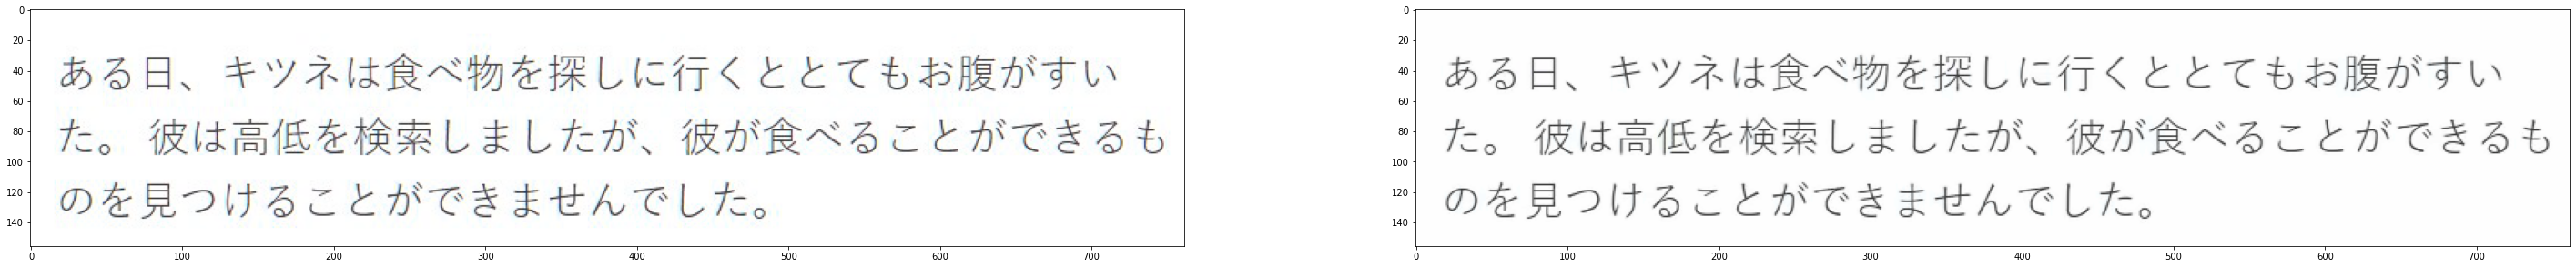

In [7]:
#import matplotlib library to show the denoising images result
from matplotlib import pyplot as plt

#do denoising images to improve the OCR accuracy
img = cv2.imread('story(jpn).png')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.figure(figsize=(50,50))
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

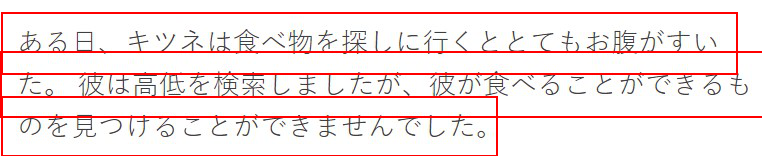

In [10]:
#draw the bounding box for the text in the image (text detection)
def draw_boxes(image, color='red', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im)

In [9]:
#get the text in the bounding box in the image in a detailed output (text recognition)
#the output will be in a list format, each item represents lists of bounding box coordinates [x,y], the text detected and model confident level, 
#respectively
#image (string, numpy array, byte) - Input image
#add_margin (float, default = 0.1) - Extend bounding boxes in all direction by certain value. This is important for language with complex script
#width_ths (float, default = 0.5) - Maximum horizontal distance to merge boxes
#link_threshold (float, default = 0.4) - Link confidence threshold
#decoder (string, default = 'greedy') - options are 'greedy', 'beamsearch' and 'wordbeamsearch'.
#blocklist (string) - Block subset of character. This argument will be ignored if allowlist is given
bounds = reader.readtext(dst, add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch', blocklist='=-')
bounds

[([[2, 12], [736, 12], [736, 74], [2, 74]],
  'ある日 キツネは食べ物を探しに行くととてもお腹がすい',
  0.8766985773332606),
 ([[1, 51], [762, 51], [762, 117], [1, 117]],
  'た。 彼は高低を検索しましたが 彼が食べることができるも',
  0.9585028055077872),
 ([[2, 96], [496, 96], [496, 156], [2, 156]],
  'のを見つけることができませんでした。',
  0.9909186181268768)]

In [11]:
#get the text in the bounding box in the image in a simple output by using detail=0 parameter (text recognition)
#the output will be in a list format but in a simple way, just the text detected, without a bounding box coordinates [x,y] and model confident level
#image (string, numpy array, byte) - Input image
#add_margin (float, default = 0.1) - Extend bounding boxes in all direction by certain value. This is important for language with complex script
#width_ths (float, default = 0.5) - Maximum horizontal distance to merge boxes
#link_threshold (float, default = 0.4) - Link confidence threshold
#decoder (string, default = 'greedy') - options are 'greedy', 'beamsearch' and 'wordbeamsearch'.
#blocklist (string) - Block subset of character. This argument will be ignored if allowlist is given
#detail (int, default = 1) - Set this to 0 for simple output
text_list = reader.readtext(dst, add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch', blocklist='=-', detail=0)
text_list

['ある日 キツネは食べ物を探しに行くととてもお腹がすい',
 'た。 彼は高低を検索しましたが 彼が食べることができるも',
 'のを見つけることができませんでした。']

In [12]:
#combine/join the detected text in the image from multiple lines into the single-line text
text_comb=' '.join(text_list)
text_comb

'ある日 キツネは食べ物を探しに行くととてもお腹がすい た。 彼は高低を検索しましたが 彼が食べることができるも のを見つけることができませんでした。'

In [13]:
#detect the language of the text in the image using translator
print(translator.detect(text_comb))

Detected(lang=ja, confidence=1)


In [14]:
#translate the detected language of the text into a default language (English)
text_en = translator.translate(text_comb)
print(text_en.text)

One day the fox was very hungry when he went looking for food. He searched high and low but couldn't find him even though he could eat.


In [15]:
#read the text audio in a default accent (English)
ta_tts = gTTS(text_en.text)

#save the text audio file
ta_tts.save('trans_en.mp3')

In [16]:
#play the text audio file in an English accent
Audio('trans_en.mp3', autoplay=True)

In [18]:
#translate the detected language of the text into the Indonesian language
text_id = translator.translate(text_comb, src='ja', dest='id')
print(text_id.text)

Suatu hari rubah sangat lapar ketika dia pergi mencari makanan. Dia mencari tinggi dan rendah tetapi tidak dapat menemukan apa pun yang bisa dia makan.


In [19]:
#read the text audio in an Indonesian accent 
ta_tts_id = gTTS(text_id.text, lang='id')

#save the text audio file
ta_tts_id.save('trans_id.mp3')

In [20]:
#play the text audio file in an Indonesian accent
Audio('trans_id.mp3', autoplay=True)

In [26]:
#translate the detected language of the text into the Japanese language
text_ja = translator.translate(text_comb, src='ja', dest='ja')
print(text_ja.text)

ある日 キツネは食べ物を探しに行くととてもお腹がすい た。 彼は高低を検索しましたが 彼が食べることができるも のを見つけることができませんでした。


In [28]:
#read the text audio in a Japanese accent 
ta_tts_ja = gTTS(text_ja.text, lang='ja')

#save the text audio file
ta_tts_ja.save('trans_ja.mp3')

In [29]:
#play the text audio file in a Japanese accent
Audio('trans_ja.mp3', autoplay=True)